In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"
import torch
from sema_guidance import StableDiffusionFreeGuidancePipeline
# from sema_guidance import StableDiffusionFreeGuidancePipeline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import torchvision.transforms.functional as TF
import torch.nn.functional as F
from tqdm.auto import tqdm
from torch.nn import init
from utils.guidance_functions import *
import argparse
from diffusers import LMSDiscreteScheduler, DDPMScheduler, DDIMScheduler, DPMSolverMultistepScheduler
from utils import *
from PIL import Image
torch.cuda.manual_seed_all(1234) 
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
mpl.rcParams['image.cmap'] = 'gray_r'


/root/anaconda3/envs/free_guide/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

print("Start Inference!")
model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda"
NUM_DDIM_STEPS = 50
pipe = StableDiffusionFreeGuidancePipeline.from_pretrained(model_id, torch_dtype=torch.float16, variant="fp16")
pipe.unet = UNetDistributedDataParallel(pipe.unet, device_ids=[0]).cuda()
# pipe.vae = UNetDistributedDataParallel(pipe.vae, device_ids=[0,1,2]).cuda()
# pipe.text_encoder = UNetDistributedDataParallel(pipe.text_encoder, device_ids=[0,1,2]).cuda()
# pipe.unet = pipe.unet.to(device)
# pipe.text_encoder = UNetDistributedDataParallel(pipe.text_encoder, device_ids=[0,1,2,3,4], output_device=3).cuda()
# pipe.unet.config, pipe.unet.dtype, pipe.unet.attn_processors, pipe.unet.set_attn_processor = pipe.unet.module.config, pipe.unet.module.dtype, pipe.unet.module.attn_processors, pipe.unet.module.set_attn_processor
# pipe.unet.config, pipe.unet.dtype = pipe.unet.module.config, pipe.unet.module.dtype
pipe.unet = pipe.unet.module
pipe = pipe.to(device)

# pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config) # DDPMScheduler -> DDIMScheduler
pipe.scheduler.set_timesteps(NUM_DDIM_STEPS)

pipe.enable_attention_slicing()
torch.backends.cudnn.benchmark = True

Start Inference!


Loading pipeline components...: 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]


Model loaded successfully!


cross_attention dimension
down_blocks：
4096 4096
1024 1024
256 256
mid：
64
up_block：
256 256 256
1024 1024 1024
4096 4096 4096
res activation
down_blocks：
layer1 (1,320,64,64)
layer2 (1,640,32,32)
layer3 (1,1280,16,16)
layer4 (1,1280,8,8)
up_block：
layer1 (1,1280,8,8)
layer2 (1,1280,16,16)
layer3 (1,640,32,32)
layer4 (1,320,64,64)

78296


  0%|          | 0/50 [00:00<?, ?it/s]/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()


tensor(0.22, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.92, device='cuda:0') tensor(1.17, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.14, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.87, device='cuda:0') tensor(1.53, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.02, device='cuda:0') tensor(1.25, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.40, device='cuda:0') tensor(1.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.98, device='cuda:0') tensor(0.87, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.07, device='cuda

  2%|▏         | 1/50 [00:27<22:40, 27.77s/it]

tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.87, device='cuda:0') tensor(0.62, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.71, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.50, device='cuda:0') tensor(0.49, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.88, device='cuda:0') tensor(0.58, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.16, device='cuda:0') tensor(0.74, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.95, device='cuda

  4%|▍         | 2/50 [00:55<22:11, 27.73s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.62, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.04, device='cuda:0') tensor(0.50, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.92, device='cuda:0') tensor(0.60, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.64, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.57, device='cuda:0') tensor(0.57, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.44, device='cuda

  6%|▌         | 3/50 [01:23<21:38, 27.64s/it]

tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.37, device='cuda:0') tensor(0.44, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.69, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.94, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.77, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.58, device='cuda:0') tensor(0.46, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.64, device='cuda

  8%|▊         | 4/50 [01:50<21:12, 27.66s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.02, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.44, device='cuda:0') tensor(0.49, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.50, device='cuda:0') tensor(0.46, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.64, device='cuda:0') tensor(0.54, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.56, device='cuda:0') tensor(0.48, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.58, device='cuda

 10%|█         | 5/50 [02:18<20:42, 27.62s/it]

tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.61, device='cuda:0') tensor(0.48, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.42, device='cuda:0') tensor(0.45, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.66, device='cuda:0') tensor(0.51, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.62, device='cuda:0') tensor(0.58, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.37, device='cuda:0') tensor(0.46, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.05, device='cuda

 12%|█▏        | 6/50 [02:45<20:12, 27.57s/it]

tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.26, device='cuda:0') tensor(0.36, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.50, device='cuda:0') tensor(0.53, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.38, device='cuda:0') tensor(0.44, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.37, device='cuda:0') tensor(0.49, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.74, device='cuda:0') tensor(0.52, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.72, device='cuda

 14%|█▍        | 7/50 [03:13<19:50, 27.69s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.16, device='cuda:0') tensor(0.44, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.07, device='cuda:0') tensor(0.42, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.32, device='cuda:0') tensor(0.39, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.32, device='cuda:0') tensor(0.38, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.68, device='cuda:0') tensor(0.64, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.38, device='cuda

 16%|█▌        | 8/50 [03:41<19:21, 27.67s/it]

tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.27, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.30, device='cuda:0') tensor(0.49, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.30, device='cuda:0') tensor(0.59, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.20, device='cuda:0') tensor(0.50, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda:0') tensor(0.46, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.30, device='cuda

 18%|█▊        | 9/50 [04:08<18:51, 27.61s/it]

tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.11, device='cuda:0') tensor(0.37, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.23, device='cuda:0') tensor(0.37, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.21, device='cuda:0') tensor(0.37, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.08, device='cuda:0') tensor(0.33, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.12, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.24, device='cuda

 20%|██        | 10/50 [04:36<18:24, 27.60s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.43, device='cuda:0') tensor(0.68, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.26, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.34, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.25, device='cuda:0') tensor(0.50, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.39, device='cuda:0') tensor(0.51, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.37, device='cuda

 24%|██▍       | 12/50 [05:24<16:05, 25.42s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.27, device='cuda:0') tensor(0.52, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.22, device='cuda:0') tensor(0.48, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.17, device='cuda:0') tensor(0.49, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda:0') tensor(0.48, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.28, device='cuda:0') tensor(0.47, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.25, device='cuda

 28%|██▊       | 14/50 [06:12<14:38, 24.39s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.17, device='cuda:0') tensor(0.54, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.12, device='cuda:0') tensor(0.53, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.15, device='cuda:0') tensor(0.51, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.24, device='cuda:0') tensor(0.51, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.14, device='cuda:0') tensor(0.50, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda

 32%|███▏      | 16/50 [07:00<13:32, 23.89s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.54, device='cuda:0') tensor(0.66, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.56, device='cuda:0') tensor(0.59, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.45, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.35, device='cuda:0') tensor(0.51, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.16, device='cuda:0') tensor(0.47, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.16, device='cuda

 36%|███▌      | 18/50 [07:48<12:37, 23.66s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.36, device='cuda:0') tensor(0.62, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.33, device='cuda:0') tensor(0.58, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.31, device='cuda:0') tensor(0.57, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.30, device='cuda:0') tensor(0.57, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.33, device='cuda:0') tensor(0.59, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.29, device='cuda

 40%|████      | 20/50 [08:36<11:45, 23.52s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.23, device='cuda:0') tensor(0.60, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.26, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.22, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.11, device='cuda:0') tensor(0.52, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.13, device='cuda:0') tensor(0.50, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.11, device='cuda

 44%|████▍     | 22/50 [09:24<10:57, 23.47s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.34, device='cuda:0') tensor(0.60, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.25, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.24, device='cuda:0') tensor(0.54, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda:0') tensor(0.53, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.46, device='cuda:0') tensor(0.52, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.36, device='cuda

 48%|████▊     | 24/50 [10:13<10:10, 23.49s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda:0') tensor(0.53, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.17, device='cuda:0') tensor(0.53, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.15, device='cuda:0') tensor(0.52, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.14, device='cuda:0') tensor(0.50, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.13, device='cuda:0') tensor(0.47, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.12, device='cuda

 52%|█████▏    | 26/50 [11:01<09:23, 23.50s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.20, device='cuda:0') tensor(0.51, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.14, device='cuda:0') tensor(0.53, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.13, device='cuda:0') tensor(0.52, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.13, device='cuda:0') tensor(0.53, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda:0') tensor(0.53, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.16, device='cuda

 56%|█████▌    | 28/50 [11:49<08:36, 23.46s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.20, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.19, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.17, device='cuda:0') tensor(0.54, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda:0') tensor(0.53, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.20, device='cuda

 60%|██████    | 30/50 [12:37<07:49, 23.46s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.20, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.17, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.15, device='cuda:0') tensor(0.54, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.14, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.11, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.14, device='cuda

 64%|██████▍   | 32/50 [13:26<07:04, 23.59s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.28, device='cuda:0') tensor(0.58, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.20, device='cuda:0') tensor(0.59, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.22, device='cuda:0') tensor(0.61, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.23, device='cuda:0') tensor(0.61, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.23, device='cuda:0') tensor(0.61, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.19, device='cuda

 68%|██████▊   | 34/50 [14:15<06:18, 23.66s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.13, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.11, device='cuda:0') tensor(0.58, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.11, device='cuda:0') tensor(0.59, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.16, device='cuda:0') tensor(0.61, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.14, device='cuda:0') tensor(0.62, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda

 72%|███████▏  | 36/50 [15:04<05:32, 23.72s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda:0') tensor(0.60, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.20, device='cuda:0') tensor(0.61, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.20, device='cuda:0') tensor(0.64, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.16, device='cuda:0') tensor(0.64, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.16, device='cuda:0') tensor(0.65, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.15, device='cuda

 76%|███████▌  | 38/50 [15:53<04:45, 23.76s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.25, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.26, device='cuda:0') tensor(0.59, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.25, device='cuda:0') tensor(0.63, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.24, device='cuda:0') tensor(0.65, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.27, device='cuda:0') tensor(0.68, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.29, device='cuda

 80%|████████  | 40/50 [16:41<03:57, 23.74s/it]

tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.28, device='cuda:0') tensor(0.54, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.26, device='cuda:0') tensor(0.57, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.28, device='cuda:0') tensor(0.62, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.26, device='cuda:0') tensor(0.62, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.31, device='cuda:0') tensor(0.65, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.32, device='cuda

 84%|████████▍ | 42/50 [17:30<03:09, 23.74s/it]

tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.32, device='cuda:0') tensor(0.54, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.26, device='cuda:0') tensor(0.58, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.31, device='cuda:0') tensor(0.64, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.29, device='cuda:0') tensor(0.67, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.28, device='cuda:0') tensor(0.69, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.41, device='cuda

 88%|████████▊ | 44/50 [18:19<02:22, 23.69s/it]

tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.31, device='cuda:0') tensor(0.57, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.46, device='cuda:0') tensor(0.62, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.46, device='cuda:0') tensor(0.67, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.47, device='cuda:0') tensor(0.71, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.43, device='cuda:0') tensor(0.73, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.36, device='cuda

 92%|█████████▏| 46/50 [19:07<01:34, 23.53s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.28, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.27, device='cuda:0') tensor(0.61, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.29, device='cuda:0') tensor(0.66, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.36, device='cuda:0') tensor(0.70, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.37, device='cuda:0') tensor(0.73, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.33, device='cuda:0') tensor(0.75, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.33, device='cuda:0') tensor(0.78, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.54, device='cuda:0') tensor(0.81, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.42, device='cuda:0') tensor(0.83, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.57, device='cuda:0') tensor(0.85, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.61, device='cuda:0') tensor(0.85, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.53, device='cuda:0') tensor(0.87, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.53, device='cuda:0') tensor(0.88, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.55, device='cuda:0') tensor(0.88, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.33, device='cuda:0') tensor(0.51, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


100%|██████████| 50/50 [20:55<00:00, 25.10s/it]
/root/anaconda3/envs/free_guide/lib/python3.9/site-packages/diffusers/pipelines/stable_diffusion_attend_and_excite/pipeline_stable_diffusion_attend_and_excite.py:498: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


torch.Size([64, 64])


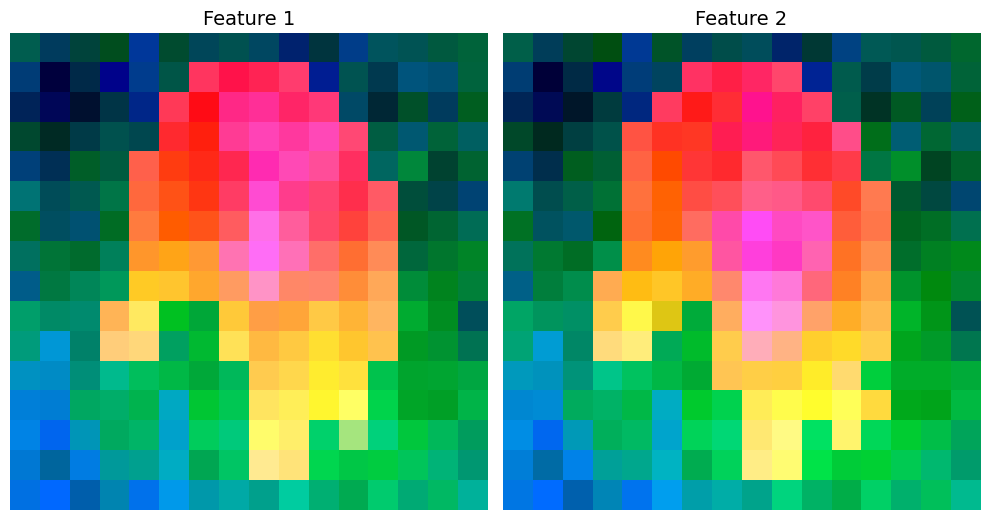

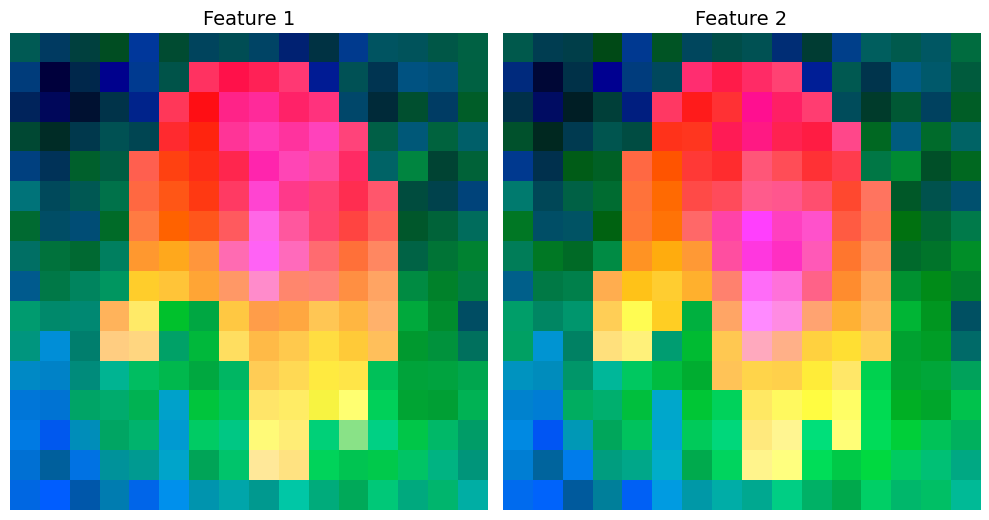

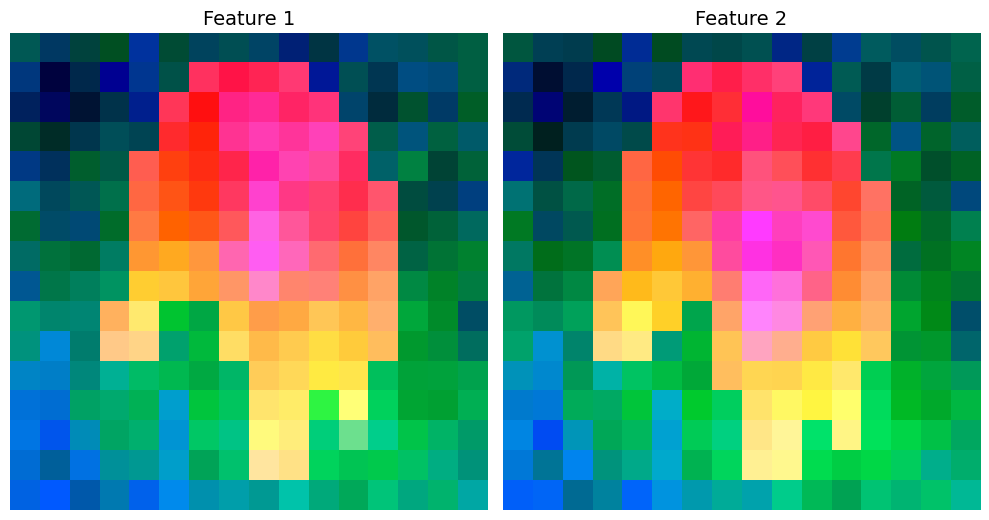

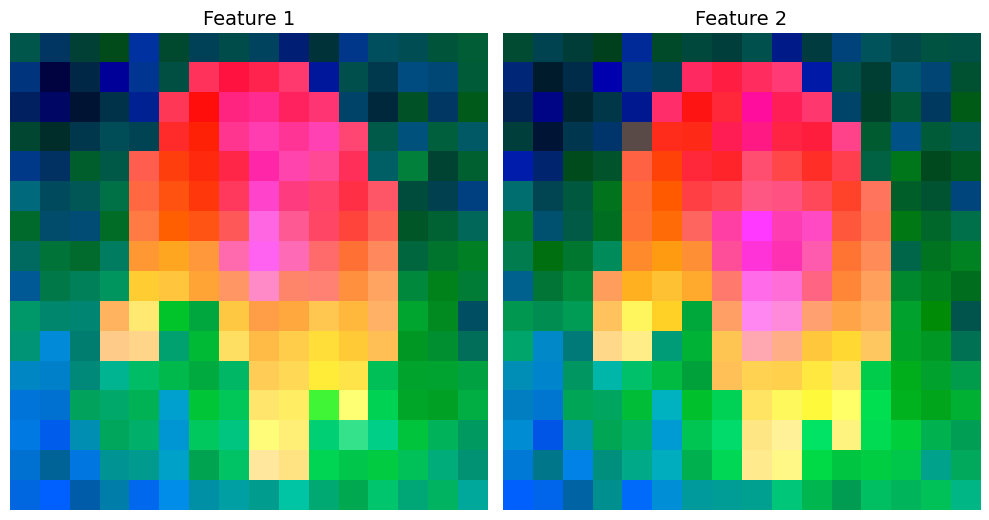

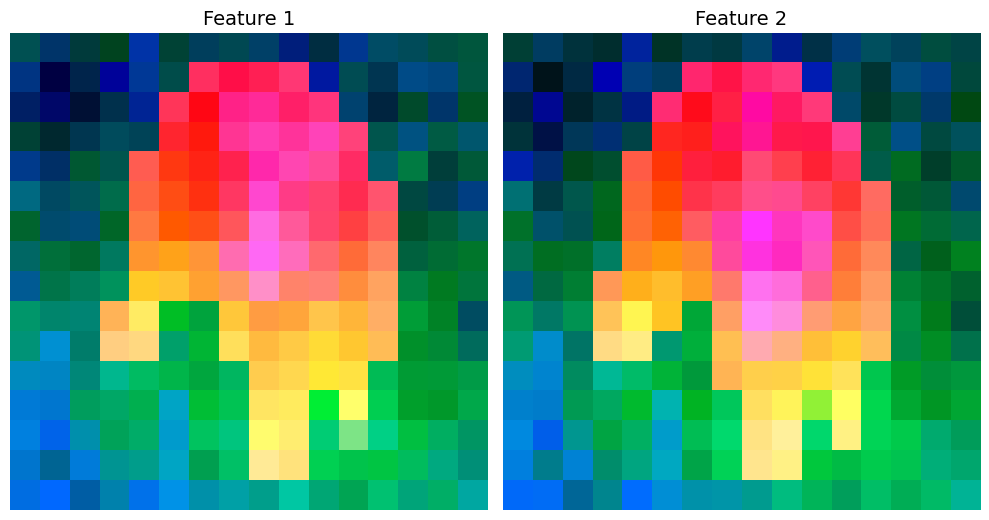

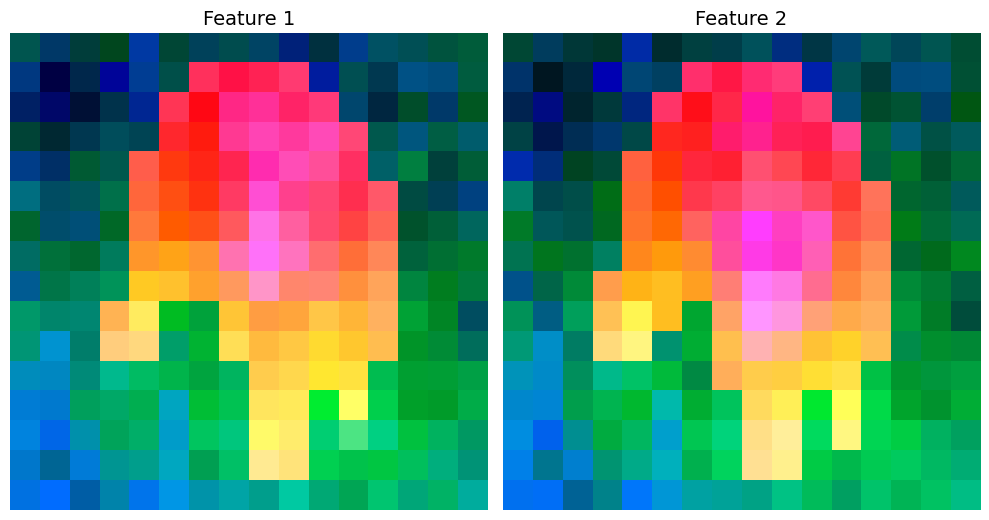

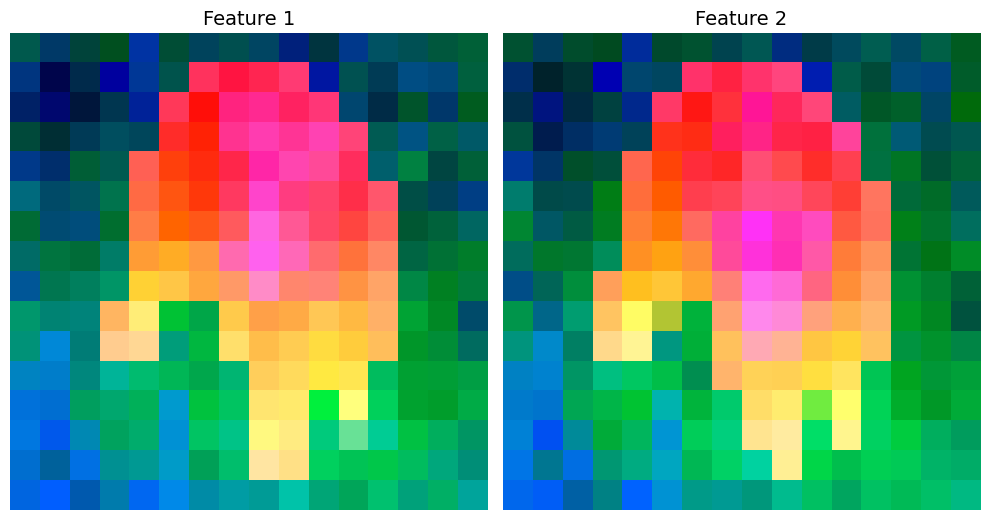

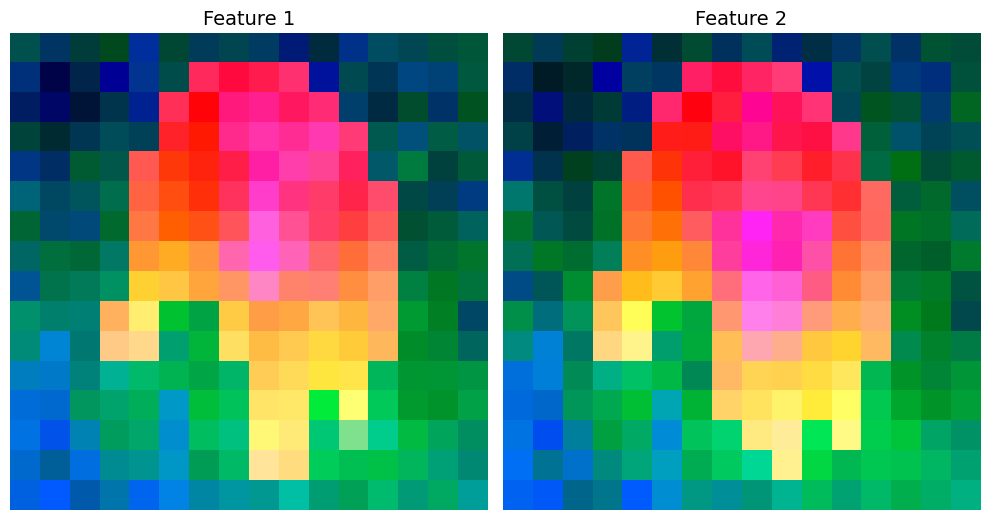

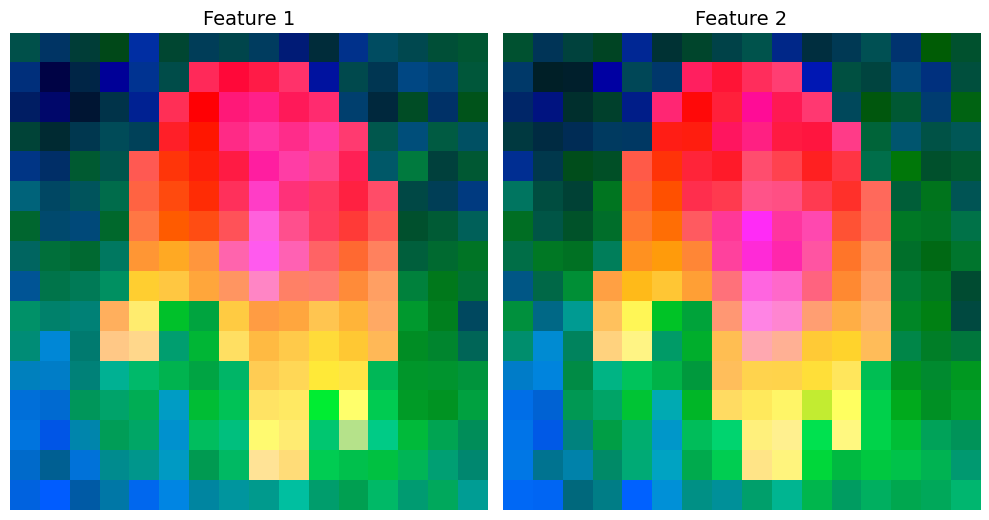

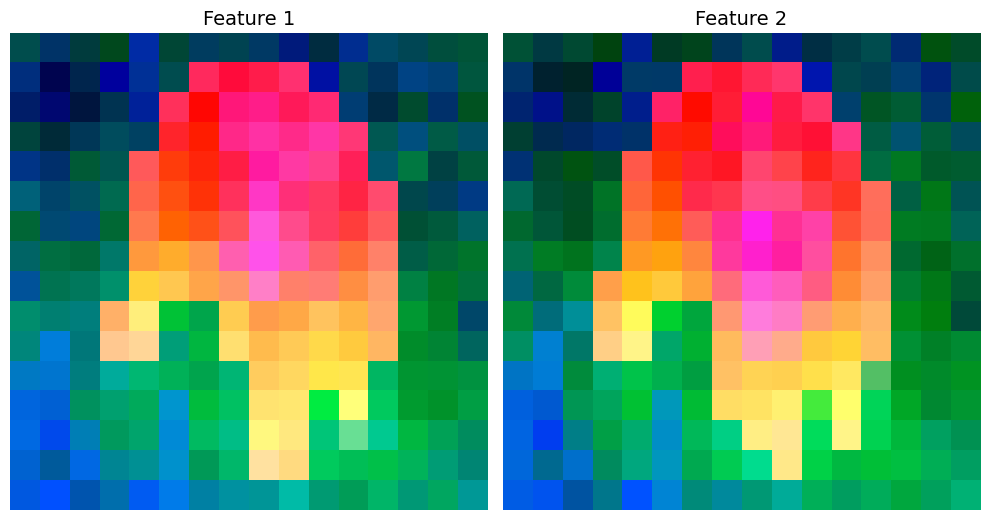

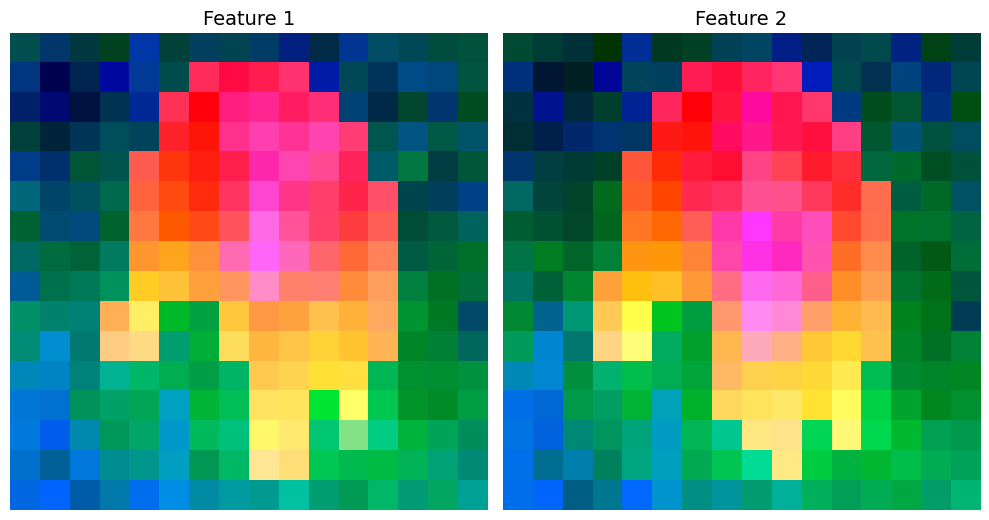

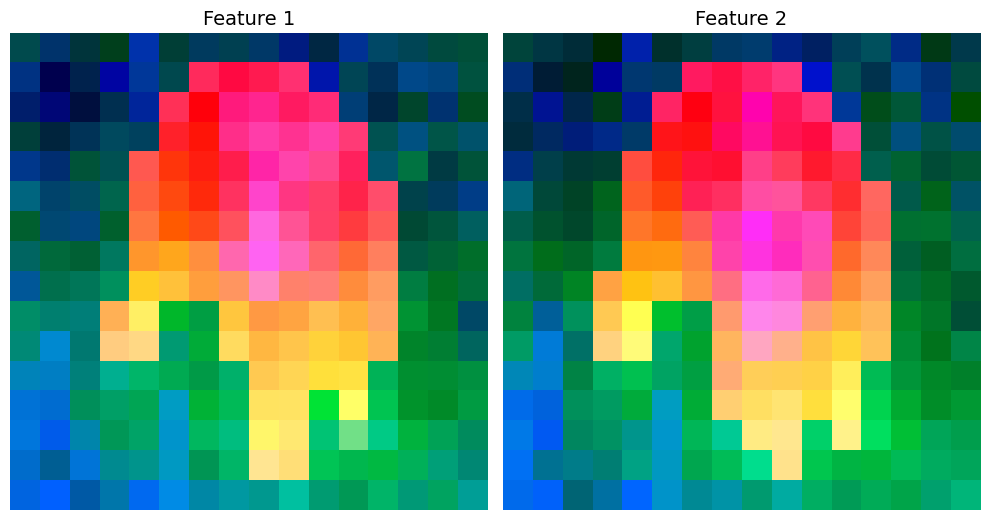

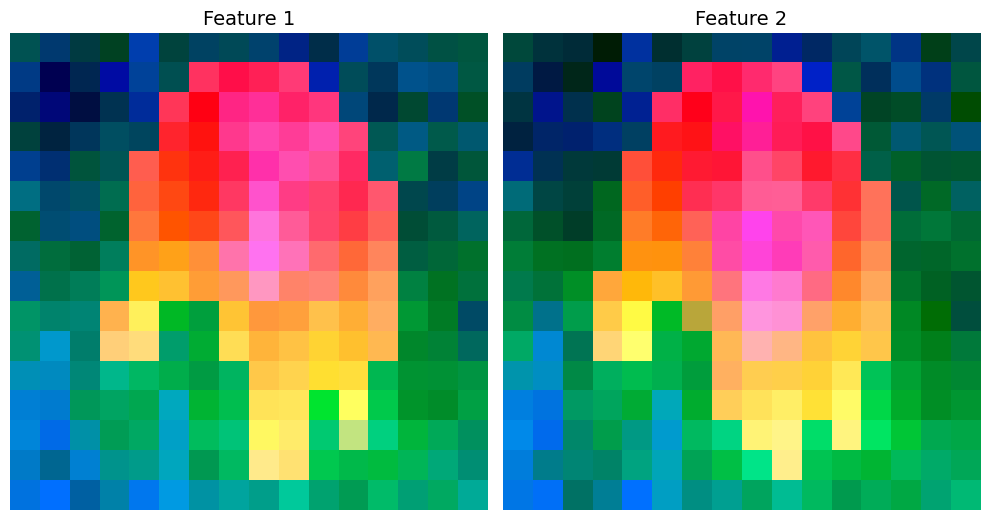

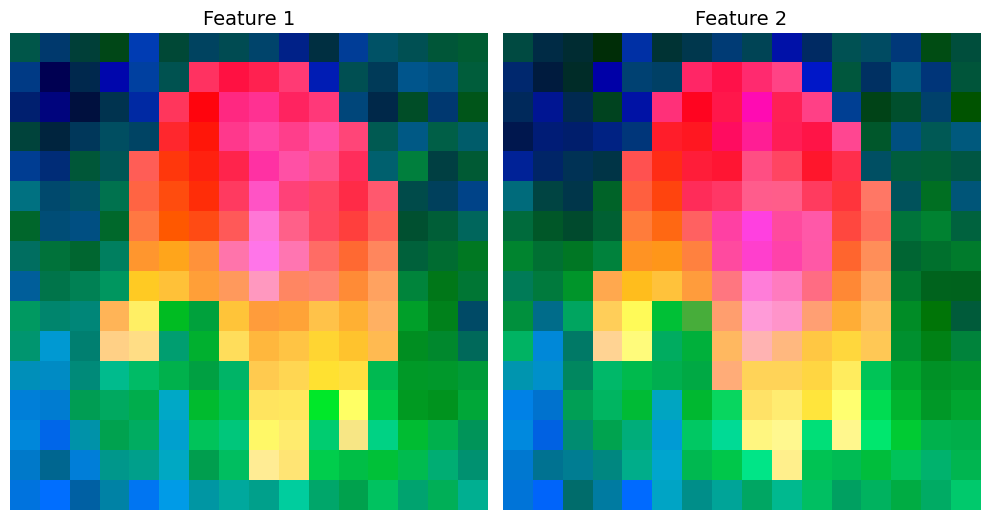

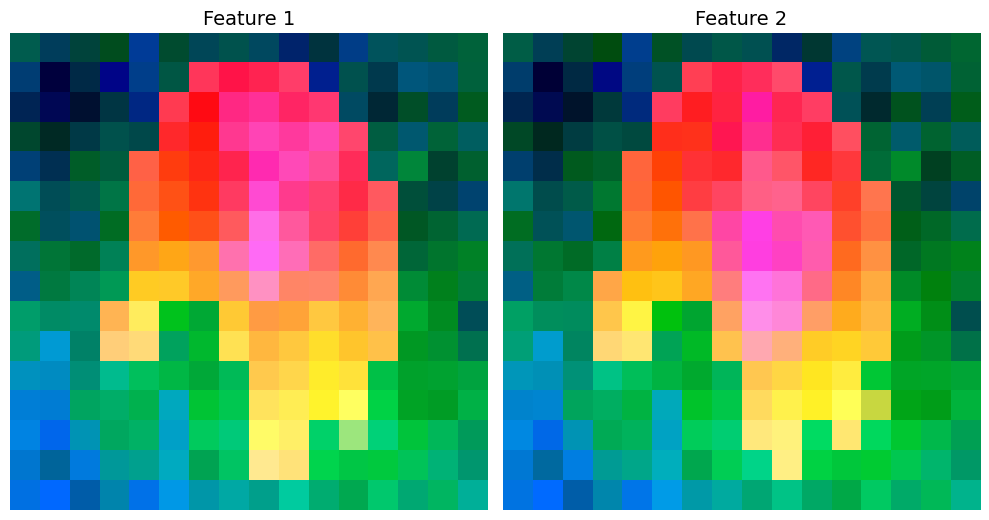

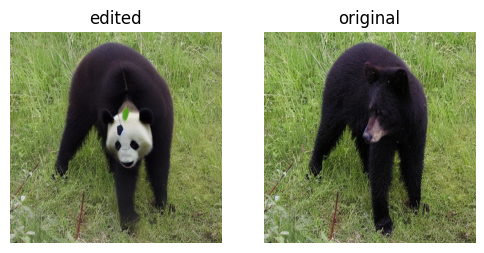

In [7]:
seed = int(torch.rand((1,)) * 100000) #13519
generator=torch.manual_seed(seed)
print(seed)

prompts = ["a photo of a bear on the grass", 
           "a photo of a panda on the grass"]

object_to_edit = 'panda'

guidance = partial(match_semantic_feature, position_weight=6.0, sem_weight=3.0, feature_weight=2.0) #feature_weight: 3.0
# move = partial(roll_shape, direction='up', factor=0.0)
# guidance = partial(move_object_by_shape, shape_weight=0.5, appearance_weight=1.5, position_weight=6, tau=move)
feature_layer = pipe.unet.up_blocks[-3].resnets[-3] #resnets: 0 1 2

img_path = './img/bear.jpg'
latents = get_ddim_latents(pipe, img_path, prompts[0], device)
init_latent = latents[-1]

image_list = pipe(prompts[1], prompts[0], obj_to_edit = object_to_edit, height=512, width=512, 
                  num_inference_steps=50, generator=generator, latents=None, all_latents=latents,
                  max_guidance_iter_per_step=15, guidance_func=guidance, g_weight=1500, feature_layer=feature_layer) 
show_images([i for i in [image_list[0][0], image_list[1][0]]], titles=['edited', 'original'], save_orig=True)

35913


  0%|          | 0/50 [00:00<?, ?it/s]

tensor(0.16, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.67, device='cuda:0') tensor(0.51, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.13, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.82, device='cuda:0') tensor(0.52, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.95, device='cuda:0') tensor(0.54, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.18, device='cuda:0') tensor(0.50, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.08, device='cuda:0') tensor(0.58, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.29, device='cuda

  2%|▏         | 1/50 [00:28<22:52, 28.01s/it]

tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.89, device='cuda:0') tensor(0.77, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.47, device='cuda:0') tensor(0.60, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.71, device='cuda:0') tensor(0.53, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.92, device='cuda:0') tensor(0.50, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.14, device='cuda:0') tensor(0.47, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.71, device='cuda

  4%|▍         | 2/50 [00:55<22:20, 27.93s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.43, device='cuda:0') tensor(0.64, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.83, device='cuda:0') tensor(0.62, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.36, device='cuda:0') tensor(0.69, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.55, device='cuda:0') tensor(0.60, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.19, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.30, device='cuda

  6%|▌         | 3/50 [01:23<21:47, 27.82s/it]

tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.09, device='cuda:0') tensor(0.40, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.22, device='cuda:0') tensor(0.39, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.14, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.42, device='cuda:0') tensor(0.39, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.44, device='cuda:0') tensor(0.56, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.41, device='cuda:0') tensor(0.48, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.48, device='cuda

  8%|▊         | 4/50 [01:51<21:17, 27.78s/it]

tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.36, device='cuda:0') tensor(0.38, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.11, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.21, device='cuda:0') tensor(0.44, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.24, device='cuda:0') tensor(0.50, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.64, device='cuda:0') tensor(0.44, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.41, device='cuda:0') tensor(0.47, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.62, device='cuda

 10%|█         | 5/50 [02:19<20:52, 27.83s/it]

tensor(0.13, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.89, device='cuda:0') tensor(0.70, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.56, device='cuda:0') tensor(0.70, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.70, device='cuda:0') tensor(0.68, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.33, device='cuda:0') tensor(0.74, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.92, device='cuda:0') tensor(0.64, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.51, device='cuda

 12%|█▏        | 6/50 [02:46<20:20, 27.73s/it]

tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.53, device='cuda:0') tensor(0.51, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(5.87, device='cuda:0') tensor(0.49, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.67, device='cuda:0') tensor(0.49, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.31, device='cuda:0') tensor(0.50, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(7.07, device='cuda:0') tensor(0.49, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(6.03, device='cuda

 14%|█▍        | 7/50 [03:14<19:50, 27.69s/it]

tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.16, device='cuda:0') tensor(0.46, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.50, device='cuda:0') tensor(0.40, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.62, device='cuda:0') tensor(0.55, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.74, device='cuda:0') tensor(0.41, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.90, device='cuda:0') tensor(0.39, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.70, device='cuda

 16%|█▌        | 8/50 [03:42<19:26, 27.78s/it]

tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.31, device='cuda:0') tensor(0.29, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.85, device='cuda:0') tensor(0.45, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.76, device='cuda:0') tensor(0.38, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.74, device='cuda:0') tensor(0.35, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.62, device='cuda:0') tensor(0.42, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.62, device='cuda

 18%|█▊        | 9/50 [04:10<19:02, 27.86s/it]

tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.79, device='cuda:0') tensor(0.36, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.84, device='cuda:0') tensor(0.36, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.04, device='cuda:0') tensor(0.46, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.56, device='cuda:0') tensor(0.41, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.34, device='cuda:0') tensor(0.37, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.43, device='cuda

 20%|██        | 10/50 [04:38<18:39, 27.98s/it]

tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.27, device='cuda:0') tensor(0.28, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.08, device='cuda:0') tensor(0.39, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.09, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.11, device='cuda:0') tensor(0.37, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.73, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.20, device='cuda

 24%|██▍       | 12/50 [05:27<16:23, 25.87s/it]

tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.18, device='cuda:0') tensor(0.40, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.12, device='cuda:0') tensor(0.40, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.66, device='cuda:0') tensor(0.37, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.02, device='cuda:0') tensor(0.41, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.89, device='cuda:0') tensor(0.45, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.17, device='cuda

 28%|██▊       | 14/50 [06:16<14:50, 24.75s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.02, device='cuda:0') tensor(0.43, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.74, device='cuda:0') tensor(0.40, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.78, device='cuda:0') tensor(0.41, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.59, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.60, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.65, device='cuda

 32%|███▏      | 16/50 [07:04<13:39, 24.12s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.95, device='cuda:0') tensor(0.43, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.17, device='cuda:0') tensor(0.46, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(4.05, device='cuda:0') tensor(0.44, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.92, device='cuda:0') tensor(0.39, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3., device='cuda:0') tensor(0.37, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3., device='cuda:0')

 36%|███▌      | 18/50 [07:53<12:47, 23.99s/it]

tensor(0.10, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.11, device='cuda:0') tensor(0.41, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.09, device='cuda:0') tensor(0.39, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.74, device='cuda:0') tensor(0.36, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.93, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.80, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.34, device='cuda

 40%|████      | 20/50 [08:42<11:57, 23.93s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.63, device='cuda:0') tensor(0.36, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.58, device='cuda:0') tensor(0.31, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.44, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.46, device='cuda:0') tensor(0.32, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.60, device='cuda:0') tensor(0.33, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.64, device='cuda

 44%|████▍     | 22/50 [09:31<11:08, 23.88s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.07, device='cuda:0') tensor(0.25, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.29, device='cuda:0') tensor(0.28, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.16, device='cuda:0') tensor(0.32, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.47, device='cuda:0') tensor(0.29, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.24, device='cuda:0') tensor(0.27, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.24, device='cuda

 48%|████▊     | 24/50 [10:21<10:22, 23.94s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.43, device='cuda:0') tensor(0.27, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.58, device='cuda:0') tensor(0.29, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.83, device='cuda:0') tensor(0.29, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.42, device='cuda:0') tensor(0.29, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.39, device='cuda:0') tensor(0.30, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.27, device='cuda

 52%|█████▏    | 26/50 [11:10<09:35, 23.97s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.40, device='cuda:0') tensor(0.32, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda:0') tensor(0.28, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.44, device='cuda:0') tensor(0.30, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.13, device='cuda:0') tensor(0.29, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.20, device='cuda:0') tensor(0.31, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.28, device='cuda

 56%|█████▌    | 28/50 [11:59<08:44, 23.86s/it]

tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.37, device='cuda:0') tensor(0.29, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.22, device='cuda:0') tensor(0.27, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.22, device='cuda:0') tensor(0.27, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.10, device='cuda:0') tensor(0.30, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.20, device='cuda:0') tensor(0.31, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.23, device='cuda

 60%|██████    | 30/50 [12:47<07:56, 23.81s/it]

tensor(0.08, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.43, device='cuda:0') tensor(0.25, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.48, device='cuda:0') tensor(0.26, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.42, device='cuda:0') tensor(0.30, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.40, device='cuda:0') tensor(0.30, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.28, device='cuda:0') tensor(0.31, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.34, device='cuda

 64%|██████▍   | 32/50 [13:37<07:10, 23.90s/it]

tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.21, device='cuda:0') tensor(0.24, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.19, device='cuda:0') tensor(0.25, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.23, device='cuda:0') tensor(0.29, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.09, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.20, device='cuda:0') tensor(0.31, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.07, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.25, device='cuda:0') tensor(0.32, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.06, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.21, device='cuda

 68%|██████▊   | 34/50 [14:26<06:22, 23.88s/it]

tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.38, device='cuda:0') tensor(0.28, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.31, device='cuda:0') tensor(0.30, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.33, device='cuda:0') tensor(0.32, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.51, device='cuda:0') tensor(0.33, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.31, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.05, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.32, device='cuda

 72%|███████▏  | 36/50 [15:14<05:32, 23.73s/it]

tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.24, device='cuda:0') tensor(0.23, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.15, device='cuda:0') tensor(0.25, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.19, device='cuda:0') tensor(0.29, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.12, device='cuda:0') tensor(0.30, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.18, device='cuda:0') tensor(0.32, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.19, device='cuda

 76%|███████▌  | 38/50 [16:03<04:43, 23.65s/it]

tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.48, device='cuda:0') tensor(0.26, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.47, device='cuda:0') tensor(0.29, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.42, device='cuda:0') tensor(0.32, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.60, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.57, device='cuda:0') tensor(0.36, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.60, device='cuda

 80%|████████  | 40/50 [16:51<03:55, 23.58s/it]

tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.51, device='cuda:0') tensor(0.25, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.55, device='cuda:0') tensor(0.28, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.66, device='cuda:0') tensor(0.30, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.63, device='cuda:0') tensor(0.32, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.48, device='cuda:0') tensor(0.33, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.58, device='cuda

 84%|████████▍ | 42/50 [17:40<03:09, 23.63s/it]

tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.60, device='cuda:0') tensor(0.26, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.53, device='cuda:0') tensor(0.28, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.55, device='cuda:0') tensor(0.31, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.69, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.67, device='cuda:0') tensor(0.36, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.02, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.86, device='cuda

 88%|████████▊ | 44/50 [18:28<02:21, 23.62s/it]

tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.54, device='cuda:0') tensor(0.24, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.38, device='cuda:0') tensor(0.27, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.65, device='cuda:0') tensor(0.30, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.57, device='cuda:0') tensor(0.33, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.58, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.38, device='cuda

 92%|█████████▏| 46/50 [19:17<01:34, 23.69s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.76, device='cuda:0') tensor(0.24, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.76, device='cuda:0') tensor(0.28, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.80, device='cuda:0') tensor(0.31, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.95, device='cuda:0') tensor(0.33, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.92, device='cuda:0') tensor(0.34, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.94, device='cuda:0') tensor(0.37, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.83, device='cuda:0') tensor(0.40, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.03, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.86, device='cuda:0') tensor(0.41, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.86, device='cuda:0') tensor(0.42, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.92, device='cuda:0') tensor(0.43, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.98, device='cuda:0') tensor(0.45, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.13, device='cuda:0') tensor(0.46, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.26, device='cuda:0') tensor(0.47, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(3.36, device='cuda:0') tensor(0.48, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


/workspace/Free-Guidance-Diffusion/utils/guidance_functions.py:190: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  flow_map = torch.stack([nearest_indices % (ori_feats.shape[3]), nearest_indices // (ori_feats.shape[3])], dim=0).float()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.04, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>) tensor(2.89, device='cuda:0') tensor(0.24, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)


100%|██████████| 50/50 [21:05<00:00, 25.31s/it]
/root/anaconda3/envs/free_guide/lib/python3.9/site-packages/diffusers/pipelines/stable_diffusion_attend_and_excite/pipeline_stable_diffusion_attend_and_excite.py:498: FutureWarning: The decode_latents method is deprecated and will be removed in 1.0.0. Please use VaeImageProcessor.postprocess(...) instead
  deprecate("decode_latents", "1.0.0", deprecation_message, standard_warn=False)


torch.Size([64, 64])


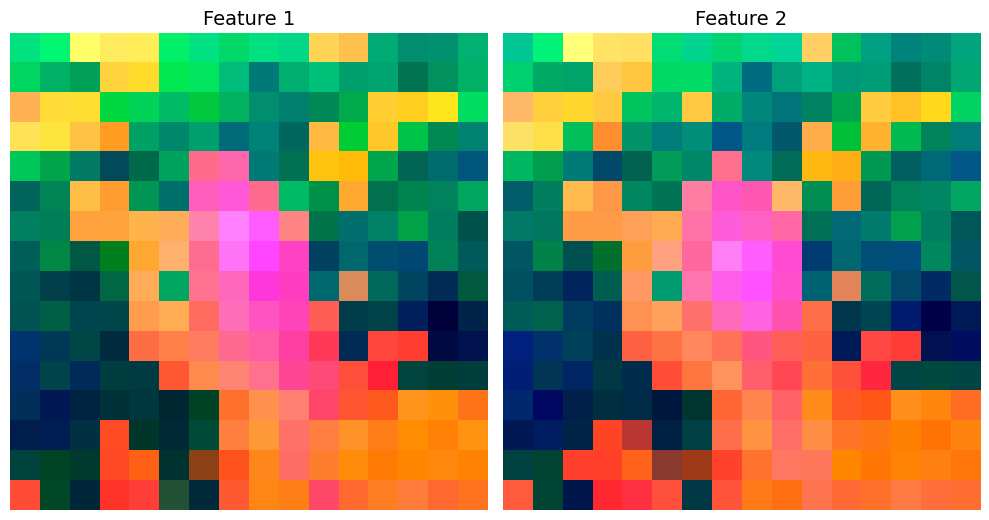

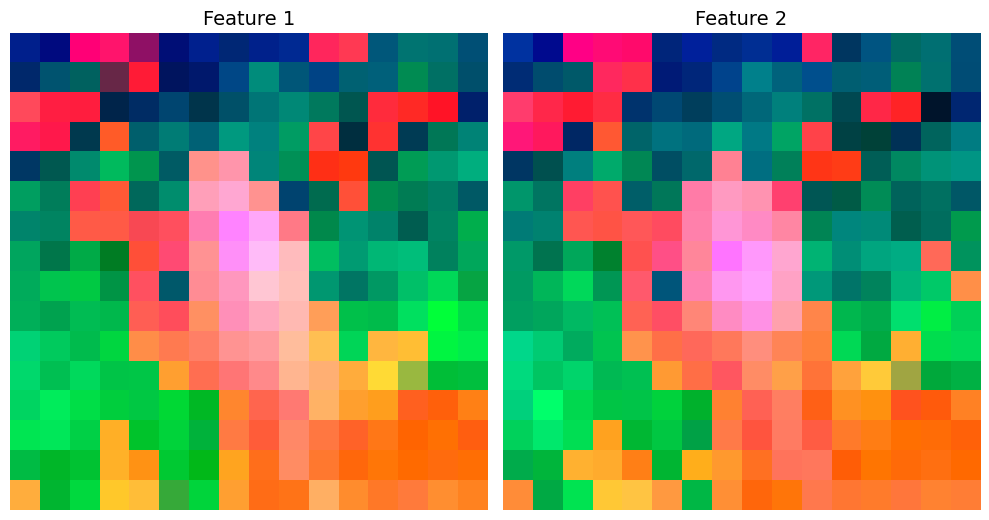

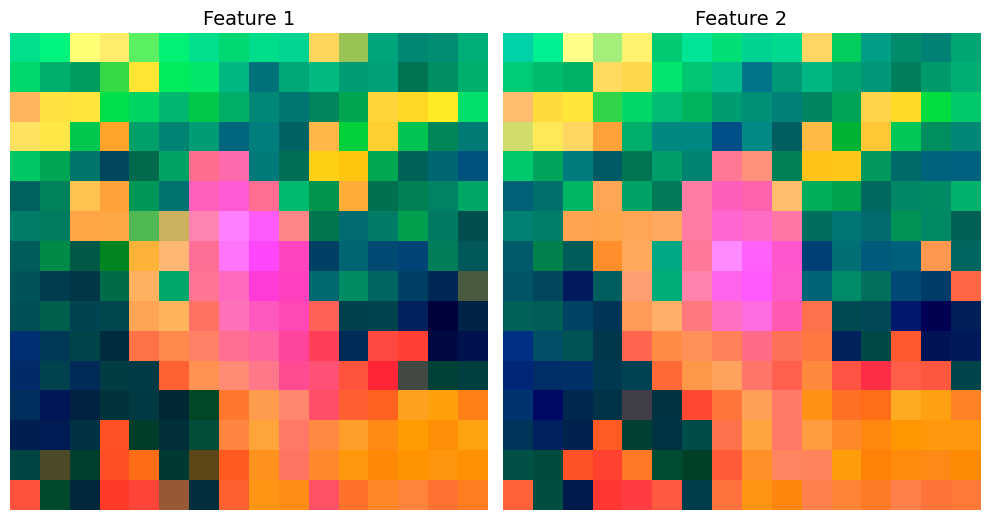

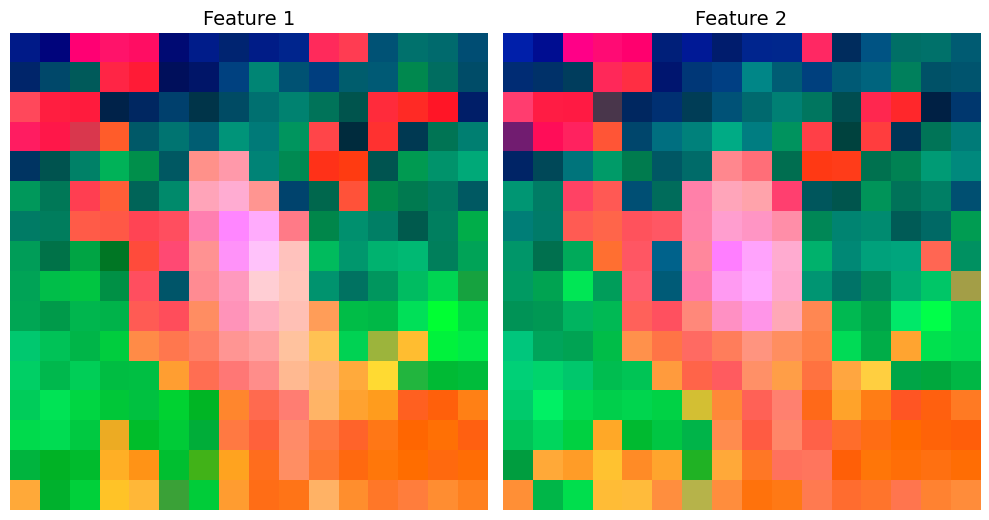

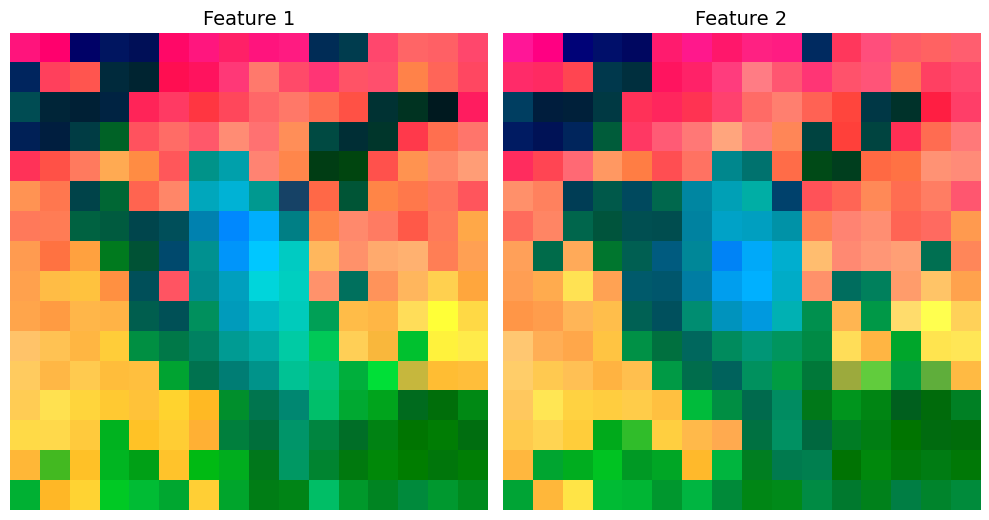

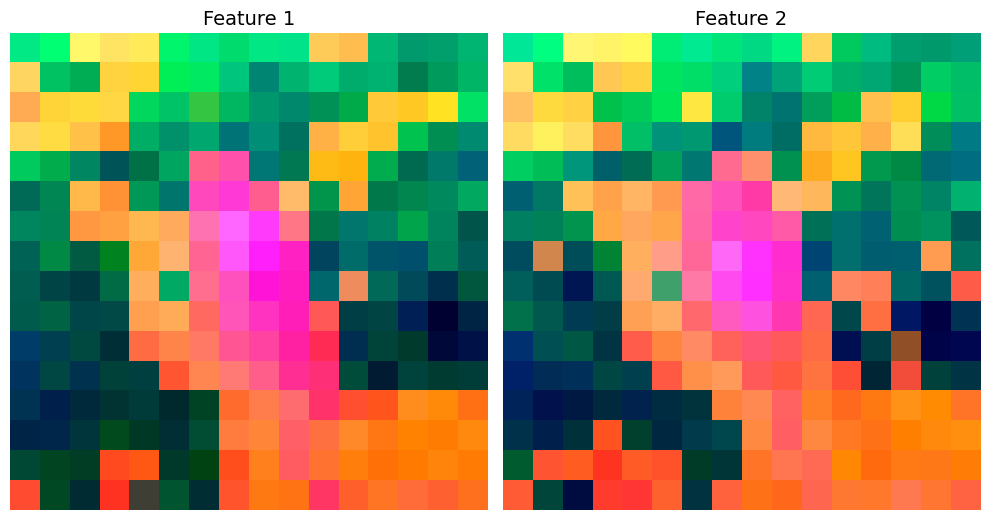

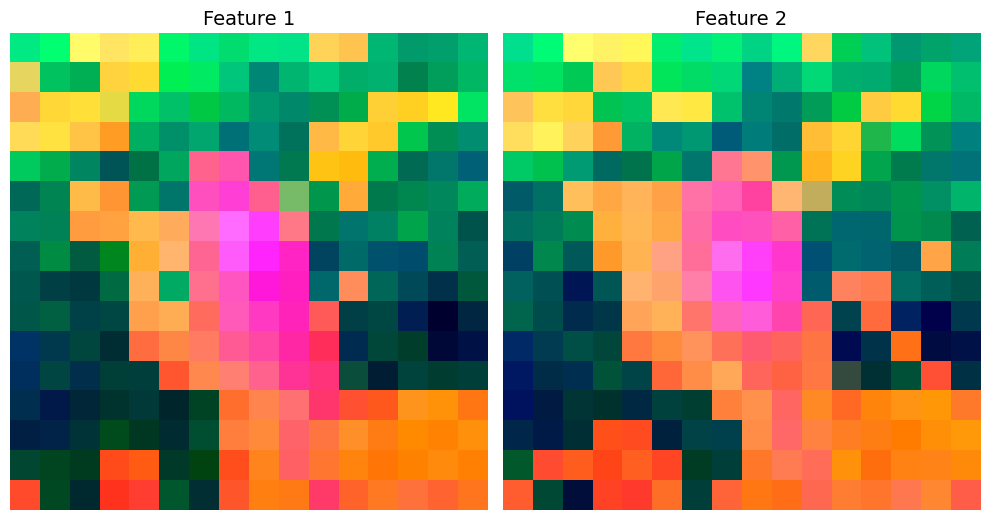

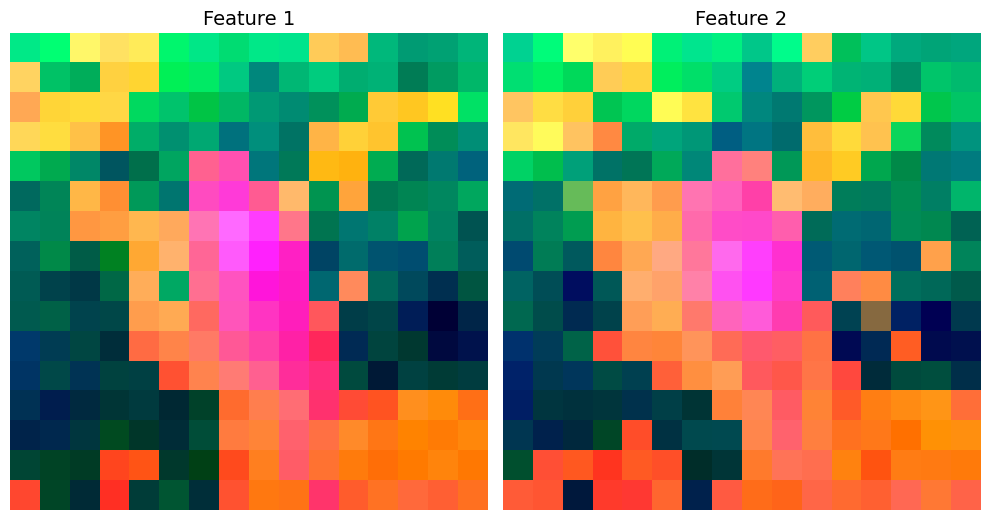

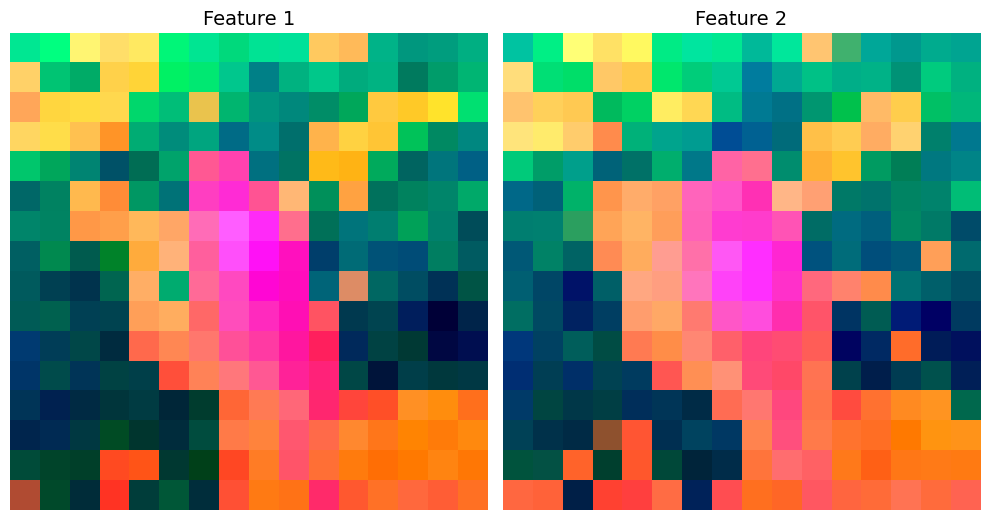

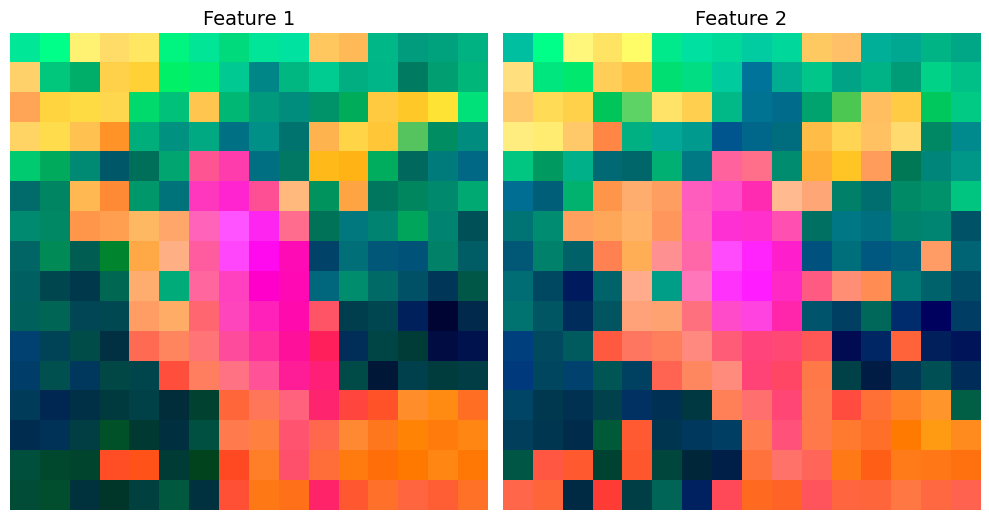

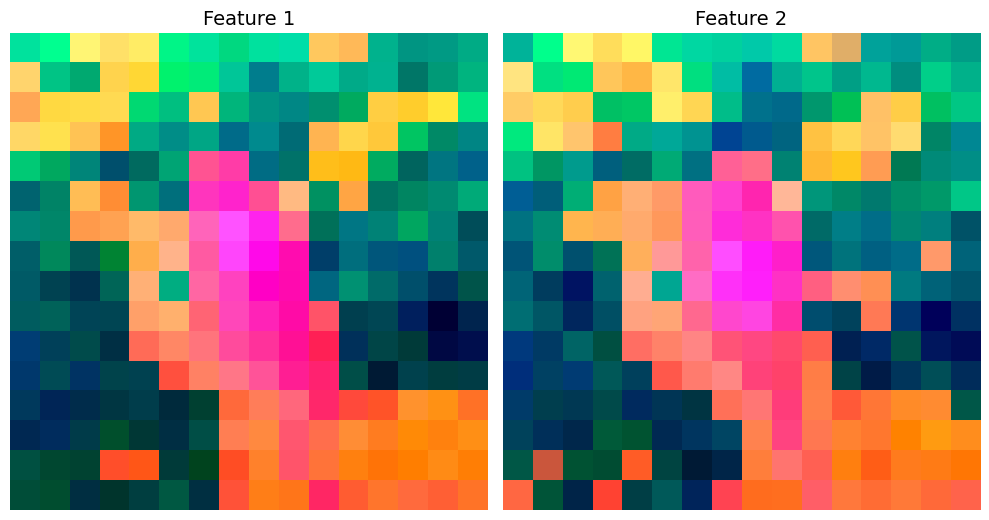

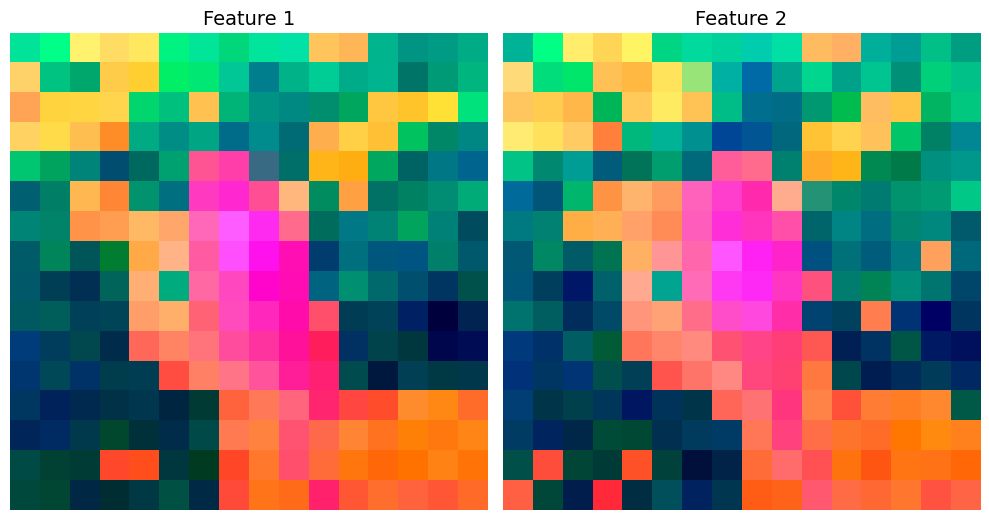

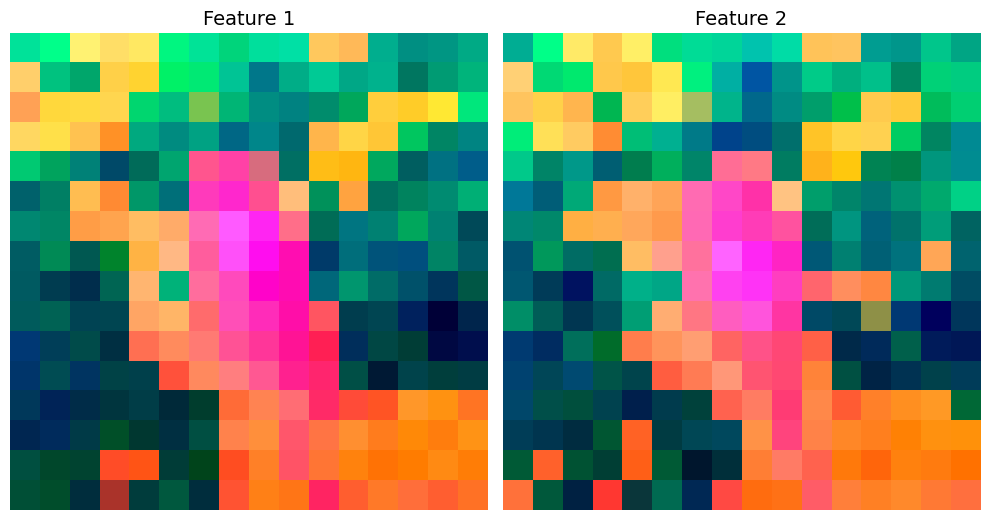

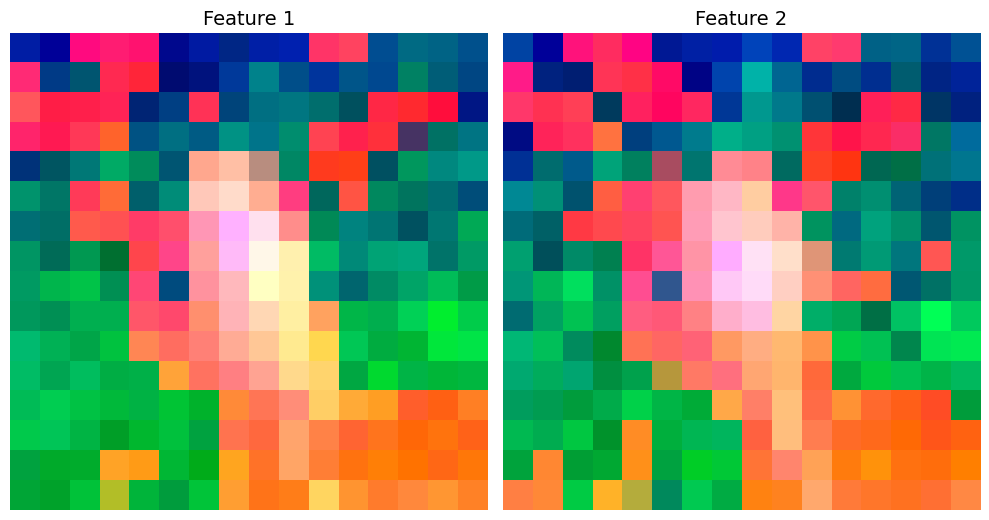

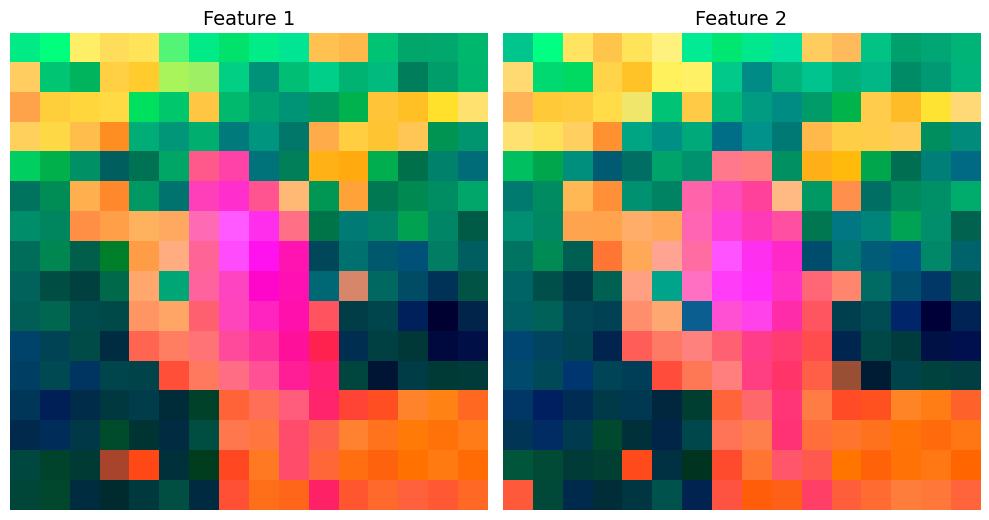

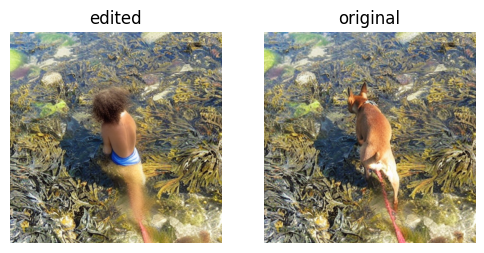

In [5]:
seed = int(torch.rand((1,)) * 100000) #13519
generator=torch.manual_seed(seed)
print(seed)

prompts = ["a photo of a dog in the river", 
           "a photo of a human on the river"]

object_to_edit = 'human'

guidance = partial(match_semantic_feature, position_weight=6.0, sem_weight=3.0, feature_weight=1.0) #feature_weight: 3.0
# move = partial(roll_shape, direction='up', factor=0.0)
# guidance = partial(move_object_by_shape, shape_weight=0.5, appearance_weight=1.5, position_weight=6, tau=move)
feature_layer = pipe.unet.up_blocks[-3].resnets[-3] #resnets: 0 1 2

img_path = './img/shepherd.png'
latents = get_ddim_latents(pipe, img_path, prompts[0], device)
init_latent = latents[-1]

image_list = pipe(prompts[1], prompts[0], obj_to_edit = object_to_edit, height=512, width=512, 
                  num_inference_steps=50, generator=generator, latents=None, all_latents=latents,
                  max_guidance_iter_per_step=15, guidance_func=guidance, g_weight=1500, feature_layer=feature_layer) 
show_images([i for i in [image_list[0][0], image_list[1][0]]], titles=['edited', 'original'], save_orig=True)

In [ ]:
seed = int(torch.rand((1,)) * 100000)
generator=torch.manual_seed(seed)
print(seed)

prompts = ["a photo of a dog", 
           "a photo of a cat"]

object_to_edit = 'cat'
move = partial(roll_shape, direction='up', factor=0.4)
guidance = partial(move_object_by_shape, shape_weight=0.5, appearance_weight=1.5, position_weight=6, tau=move)

img_path = './img/dog.png'
latents = get_ddim_latents(pipe, img_path, prompts[0], device)
init_latent = latents[-1]

image_list = pipe(prompts[1], prompts[0], obj_to_edit = object_to_edit, height=512, width=512, 
                  num_inference_steps=50, generator=generator, latents=init_latent, all_latents=latents,
                  max_guidance_iter_per_step=15, guidance_func=guidance, g_weight=0)
show_images([i for i in [image_list[0].images[0], image_list[1].images[0]]], titles=['edited', 'original'], save_orig=True)